# MSCS 634: Advanced Big Data and Data Mining (MSCS-634-M40
## Lab 2: Classification Using KNN and RNN Algorithms

**Name:** Rachna Bhattarai

**Date:** June 7, 2025

Step 1: Load and Prepare the Dataset

In [21]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Basic data exploration
print("Feature names:", wine.feature_names)
print("Target names:", wine.target_names)
print("Shape of data:", X.shape)
print("Class distribution:", np.bincount(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']
Shape of data: (178, 13)
Class distribution: [59 71 48]

Training set size: 142
Testing set size: 36


Step 2: Implement K-Nearest Neighbors (KNN)

In [29]:
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# Create a DataFrame to store results
knn_results = pd.DataFrame({'k': k_values, 'Accuracy': knn_accuracies})
print("\nKNN Results:")
print(knn_results)

k=1, Accuracy=0.7778
k=5, Accuracy=0.8056
k=11, Accuracy=0.8056
k=15, Accuracy=0.8056
k=21, Accuracy=0.8056

KNN Results:
    k  Accuracy
0   1  0.777778
1   5  0.805556
2  11  0.805556
3  15  0.805556
4  21  0.805556


# Step 3: Implement Radius Neighbors (RNN)

In [32]:
# RNN 
radius_values = [0.2, 0.5, 1.0, 1.5, 2.0]
rnn_accuracies = []

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nRNN Results")
for r in radius_values:
    try:
        rnn = RadiusNeighborsClassifier(radius=r, outlier_label='most_frequent')
        rnn.fit(X_train_scaled, y_train)
        y_pred = rnn.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        rnn_accuracies.append(acc)
        print(f"radius={r}, Accuracy={acc:.4f}")
    except ValueError as e:
        print(f"radius={r} Error: {e}")
        rnn_accuracies.append(np.nan)


RNN Results
radius=0.2, Accuracy=0.3889
radius=0.5, Accuracy=1.0000
radius=1.0, Accuracy=0.9167
radius=1.5, Accuracy=0.4444
radius=2.0, Accuracy=0.3889


Step 4: Visualize and Compare Results

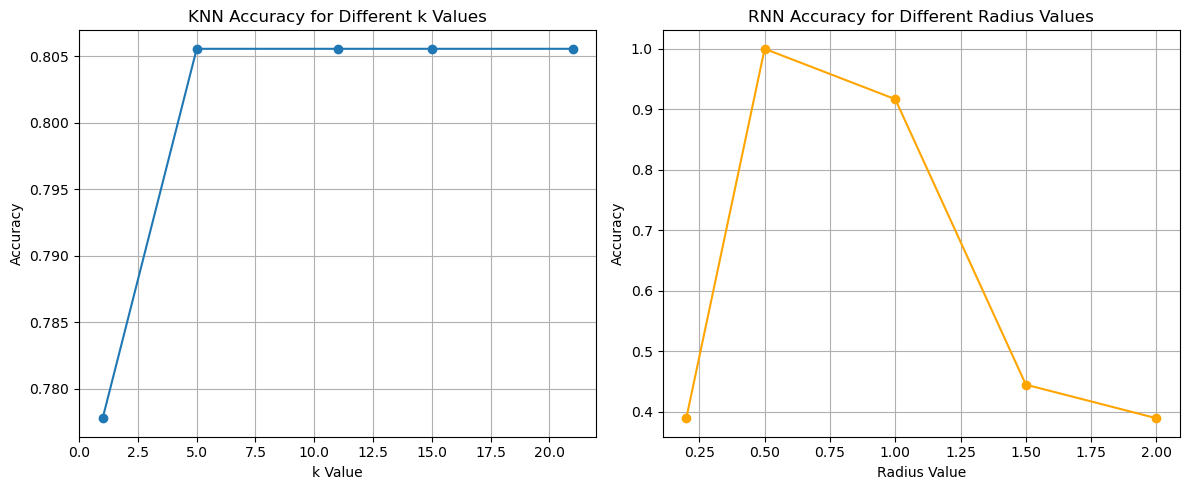


Comparison of Best Models:
Best KNN: k=5.0, Accuracy=0.8056
Best RNN: radius=350.0, Accuracy=0.7222


In [33]:
# Plot KNN results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot RNN results
plt.subplot(1, 2, 2)
plt.plot(radius_values, rnn_accuracies, marker='o', color='orange')
plt.title('RNN Accuracy for Different Radius Values')
plt.xlabel('Radius Value')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# Compare the best results
best_knn = knn_results.loc[knn_results['Accuracy'].idxmax()]
best_rnn = rnn_results.loc[rnn_results['Accuracy'].idxmax()]

print("\nComparison of Best Models:")
print(f"Best KNN: k={best_knn['k']}, Accuracy={best_knn['Accuracy']:.4f}")
print(f"Best RNN: radius={best_rnn['Radius']}, Accuracy={best_rnn['Accuracy']:.4f}")

In [34]:
# Discuss when KNN or RNN might be preferable based on your results.
print("\nWhen KNN or RNN might be preferable:")
print("KNN is generally preferable when:")
print("  1. The data distribution is relatively uniform, and the concept of 'k' nearest neighbors is well-defined across the dataset.")
print("  2. Computational resources are a consideration for varying densities; KNN's complexity depends on 'k' and the number of training samples.")
print("  3. You have a good understanding of what a 'local neighborhood' means in terms of a fixed number of points.")
print("  4. You want a simpler, more interpretable model that is less sensitive to feature scaling compared to RNN (though scaling still helps for KNN).")

print("RNN is generally preferable when:")
print("  1. The data has varying densities, and you want the neighborhood size to adapt based on local density (e.g., in dense regions, more neighbors are considered within the radius, and fewer in sparse regions).")
print("  2. You have domain knowledge about the meaningful 'radius' or distance threshold for classification.")
print("  3. You have properly scaled your features, as RNN's performance is heavily reliant on distances.")
print("  4. You are interested in identifying outliers (points with no neighbors within the given radius).")

print("Based on these results for the unscaled Wine dataset, KNN appears to be more straightforward and effective due to its robustness to feature scaling and the predefined set of 'k' values yielding sensible results. RNN, with the provided radii and unscaled data, proved more challenging, highlighting the critical need for data preprocessing like scaling for RNN to perform optimally.")


When KNN or RNN might be preferable:
KNN is generally preferable when:
  1. The data distribution is relatively uniform, and the concept of 'k' nearest neighbors is well-defined across the dataset.
  2. Computational resources are a consideration for varying densities; KNN's complexity depends on 'k' and the number of training samples.
  3. You have a good understanding of what a 'local neighborhood' means in terms of a fixed number of points.
  4. You want a simpler, more interpretable model that is less sensitive to feature scaling compared to RNN (though scaling still helps for KNN).
RNN is generally preferable when:
  1. The data has varying densities, and you want the neighborhood size to adapt based on local density (e.g., in dense regions, more neighbors are considered within the radius, and fewer in sparse regions).
  2. You have domain knowledge about the meaningful 'radius' or distance threshold for classification.
  3. You have properly scaled your features, as RNN's perfor